In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [14]:
df = pd.read_csv('glassdoor_data.csv')

# columns to be used for the machine learning model
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer_provided',
             'job_state','same_state','age','python_yn','spark','aws','excel','job_simp','seniority','desc_len']]

In [3]:
df_dummies = pd.get_dummies(df_model)

X = df_dummies.drop(columns='avg_salary', axis=1)
y = df_dummies['avg_salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X_sm = X = sm.add_constant(X)
s_model = sm.OLS(y,X_sm)
s_model.fit().summary()


7      0.619     -14.272       8.509
Size_1001 to 5000 employees                           6.1362      3.878      1.582      0.114      -1.481      13.753
Size_201 to 500 employees                             2.2568      3.873      0.583      0.560      -5.350       9.864
Size_5001 to 10000 employees                         -3.8766      5.440     -0.713      0.476     -14.561       6.808
Size_501 to 1000 employees                            2.1829      4.059      0.538      0.591      -5.790      10.155
Size_51 to 200 employees                              4.2001      4.422      0.950      0.343      -4.484      12.884
Size_Unknown                                         20.8850     13.992      1.493      0.136      -6.594      48.363
Type of ownership_-1                                 13.6113      8.629      1.577      0.115      -3.335      30.558
Type of ownership_College / University                6.4226     17.739      0.362      0.717     -28.415      41.260
Type of ownership_Company - Private                   8.5961      5.239      1.641      0.101      -1.693      18.885
Type of ownership_Company - Public                   13.2838      5.699      2.331      0.020       2.092      24.476
Type of ownership_Government                        -15.3361     15.289     -1.003      0.316     -45.363      14.690
Type of ownership_Hospital                           -7.1449      9.965     -0.717      0.474     -26.715      12.425
Type of ownership_Nonprofit Organization             -9.8081      6.711     -1.461      0.144     -22.988       3.372
Type of ownership_Other Organization                 -5.9776     14.342     -0.417      0.677     -34.145      22.190
Type of ownership_School / School District           -5.9877     23.790     -0.252      0.801     -52.711      40.735
Type of ownership_Subsidiary or Business Segment     12.7968      6.928      1.847      0.065      -0.809      26.403
Type of ownership_Unknown                            33.1643     28.609      1.159      0.247     -23.021      89.350
Industry_-1                                           5.8348      7.935      0.735      0.462      -9.749      21.418
Industry_Accounting                                   2.5126     13.486      0.186      0.852     -23.972      28.998
Industry_Advertising & Marketing                     11.6598      5.976      1.951      0.051      -0.076      23.395
Industry_Aerospace & Defense                          5.5848      3.109      1.796      0.073      -0.522      11.691
Industry_Architectural & Engineering Services       -32.4290     15.935     -2.035      0.042     -63.725      -1.133
Industry_Auctions & Galleries                         9.2579     22.878      0.405      0.686     -35.673      54.188
Industry_Banks & Credit Unions                      -16.9696      8.047     -2.109      0.035     -32.773      -1.166
Industry_Beauty & Personal Accessories Stores        15.4350     21.561      0.716      0.474     -26.910      57.780
Industry_Biotech & Pharmaceuticals                    6.4280      2.045      3.144      0.002       2.413      10.443
Industry_Brokerage Services                          28.1129     15.522      1.811      0.071      -2.371      58.597
Industry_Colleges & Universities                     10.9589     12.989      0.844      0.399     -14.551      36.469
Industry_Computer Hardware & Software                -0.9258      3.250     -0.285      0.776      -7.308       5.457
Industry_Construction                               -15.5552     10.562     -1.473      0.141     -36.297       5.187
Industry_Consulting                                  12.9352      5.900      2.192      0.029       1.347      24.523
Industry_Consumer Product Rental                     -2.4434     13.017     -0.188      0.851     -28.008      23.121
Industry_Consumer Products Manufacturing             13.8230      9.857      1.402      0.161      -5.536      33.182
Industry_Department, Clothing, & Shoe Stores          4.7499     11.5

In [5]:
lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm, X_train,y_train, scoring = 'neg_mean_absolute_error', cv=4))

-19.770697903816348

In [12]:
ls = Lasso(alpha=0.1)
ls.fit(X_train, y_train)

y_pred = ls.predict(X_test)

#mean_squared_error(y_test, y_pred)
np.mean(cross_val_score(ls, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))

-19.28610807928635

-19.25779807999977


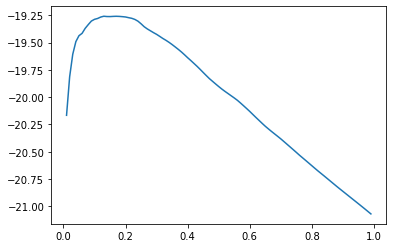

In [7]:
# tuning for alpha
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    ls = Lasso(alpha=i/100)
    error.append(np.mean(cross_val_score(ls, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)))

print(max(error))
plt.plot(alpha,error)


In [8]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

np.mean(cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))


-15.49530414124323

In [9]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

#gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
#gs.fit(X_train,y_train)

#gs.best_score_
#gs.best_estimator_

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [('scaler',StandardScaler()),('rf',RandomForestRegressor(criterion='mae', n_estimators=170, max_features='auto'))]
pipeline = Pipeline(steps)

pipeline.fit(X_train,y_train)

print(np.mean(cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)))


-14.989038425963628


In [13]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_ls = ls.predict(X_test)
tpred_rf = pipeline.predict(X_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)
mean_absolute_error(y_test,tpred_ls)
mean_absolute_error(y_test,tpred_rf)

mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

14.332088540331696